# Predicting Long-Lived Bugs: Results for Paper

# 1. Python Packages e Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans

%matplotlib inline 

plt.style.use('default')
sns.set_context("paper")

In [2]:
def read_reports_file(data_file):
    results = pd.read_csv(data_file)
    rows_and_cols = results.shape
    print('Before filter: There are {} rows and {} columns.'.format(
        rows_and_cols[0], rows_and_cols[1]
        )
    )
    is_between_two_years = (results['days_to_resolve'] >= 0) & (results['days_to_resolve'] <= 730)
    results = results[is_between_two_years]
    
    rows_and_cols = results.shape
    print('After filter: There are {} rows and {} columns.'.format(
        rows_and_cols[0], rows_and_cols[1]
        )
    )
    return results

def read_metrics_file(metric_file):
    results_file = metric_file
    results = pd.read_csv(results_file)
    
    results.loc[results['dataset'] == 'eclipse', 'dataset'] = 'Eclipse'
    results.loc[results['dataset'] == 'freedesktop' , 'dataset'] = 'Freedesktop'
    results.loc[results['dataset'] == 'gnome' , 'dataset'] = 'Gnome'
    results.loc[results['dataset'] == 'mozilla', 'dataset'] = 'Mozilla'
    results.loc[results['dataset'] == 'netbeans' , 'dataset'] = 'Netbeans'
    results.loc[results['dataset'] == 'winehq', 'dataset'] = 'WineHQ'
    
    results.loc[results['classifier'] == 'knn', 'classifier'] = 'K-NN'
    results.loc[results['classifier'] == 'nb' , 'classifier'] = 'Naïve Bayes'
    results.loc[results['classifier'] == 'rf' , 'classifier'] = 'Random Forest'
    results.loc[results['classifier'] == 'svmRadial', 'classifier'] = 'SVM'
    
    results['acc_class_1'] = results.acc_class_1.fillna(0)
    results['balanced_acc'] = results.balanced_acc.fillna(results.acc_class_0 / 2)

    results.rename(columns={ 'dataset' : 'Project'
                            , 'n_term' :'Terms'
                            , 'classifier':'Classifier'
                            , 'threshold' : 'Bug_Fixing_Time'}, inplace=True)
    
    rows_and_cols = results.shape
    print('There are {} rows and {} columns.\n'.format(
        rows_and_cols[0], rows_and_cols[1]
        )
    )

    #results_information = results.info()

    return results.sort_values('Classifier', ascending=True)

def plot_line(project, data, x, y, h, c):
    sns.color_palette("bright")
    sns.set(font_scale=1)
    sns.set_style("ticks")
    sns.set_context("paper", rc={"font.size":10,"axes.titlesize":8,"axes.labelsize":10})
    g = sns.FacetGrid(data=data, hue=h, col=c)
    g = g.map(sns.lineplot, x, y)
    g.set(xlim=(4, 64))
    g.set(xticks=range(4, 64, 4))
    g.add_legend()
    plt.savefig('figures/{}_{}_by_{}_line_plot.pdf'.format(project.lower(), c, h), bbox_inches='tight') 
    return 

def plot_hist(data, project):
    #plt.figure(figsize=(5,5))
    sns.color_palette("bright")
    sns.set(font_scale=1)
    sns.set_style("ticks")
    sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
    median = data.median()
    percentile = np.percentile(data, 75)
    ax = sns.distplot(data, kde=False, color='black', bins=30)
    sns.despine()

    
    ax.set_ylabel("Number of bug reports")
    ax.set_xlabel("Bug fix time")
    ax.axvline(median, color='r', linestyle='--', label = "Median : {}".format(median))
    ax.axvline(percentile, color='b', linestyle='--', label = "3rd Quartile : {}".format(percentile))
    plt.legend(fontsize='small', title_fontsize='40')
    plt.savefig('figures/{}_days_to_resolve_histogram.pdf'.format(project.lower()), bbox_inches='tight') 

# 2. Projects

This eighth experiment has used a dataset of bug reports extracted from Eclipse Bugzilla Tracking System. The protocol parameters and values employed in this experiment is shown in the following table:

| Project       | Period                   |No.Reports    | Days To Resolve  | No. Reports in Days |
| ------------- | ------------------------ |:-------------:| ----------------:| -------------------:|
| Eclipse       | 2001-10-10 to 2018-01-31 |  8438        |  0-730           |       7614          |
| Freedesktop   | 2003-01-09 to 2018-01-22 |  8271        |  0-730           |       7644          |
| Gnome         | 1999-02-18 to 2018-01-04 |  5680        |  0-730           |       4904          |
| Mozilla       | 1998-04-21 to 2014-04-22 |  2431        |  0-730           |       2163          |
| Netbeans      | 1999-02-11 to 2017-09-30 |  7441        |  0-730           |       6640          |
| WineHQ        | 2000-08-30 to 2019-02-26 |  8058        |  0-730           |       6185          |


## 2.1 Histograms

In [3]:
print('BUG REPORTS\n')
print('Project : {}'.format("Eclipse"))
reports_eclipse = read_reports_file('datasets/20190409_eclipse_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_eclipse['creation_date'].min(), reports_eclipse['creation_date'].max()))

print('Project : {}'.format("Freedesktop"))
reports_freedesktop = read_reports_file('datasets/20190409_freedesktop_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_freedesktop['creation_date'].min(), reports_freedesktop['creation_date'].max()))

print('Project : {}'.format("Gnome"))
reports_gnome = read_reports_file('datasets/20190409_gnome_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_gnome['creation_date'].min(), reports_gnome['creation_date'].max()))

print('Project : {}'.format("Mozilla"))
reports_mozilla = read_reports_file('datasets/20190409_mozilla_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_mozilla['creation_date'].min(), reports_mozilla['creation_date'].max()))

print('Project : {}'.format("Netbeans"))
reports_netbeans = read_reports_file('datasets/20190409_netbeans_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_netbeans['creation_date'].min(), reports_netbeans['creation_date'].max()))

print('Project : {}'.format("WineHQ"))
reports_winehq = read_reports_file('datasets/20190409_winehq_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_winehq['creation_date'].min(), reports_winehq['creation_date'].max()))


BUG REPORTS

Project : Eclipse
Before filter: There are 8438 rows and 19 columns.
After filter: There are 7614 rows and 19 columns.
Creation date from 2001-10-10 to 2018-01-31

Project : Freedesktop
Before filter: There are 8271 rows and 19 columns.
After filter: There are 7644 rows and 19 columns.
Creation date from 2003-01-09 to 2018-01-22

Project : Gnome
Before filter: There are 5680 rows and 19 columns.
After filter: There are 4904 rows and 19 columns.
Creation date from 1999-02-18 to 2018-01-04

Project : Mozilla
Before filter: There are 2431 rows and 19 columns.
After filter: There are 2163 rows and 19 columns.
Creation date from 1998-04-21 to 2014-04-22

Project : Netbeans
Before filter: There are 7441 rows and 19 columns.
After filter: There are 6640 rows and 19 columns.
Creation date from 1999-02-11 to 2017-09-30

Project : WineHQ
Before filter: There are 8058 rows and 19 columns.
After filter: There are 6185 rows and 19 columns.
Creation date from 2000-08-30 to 2019-02-26



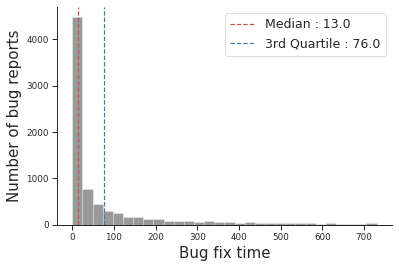

In [4]:
plot_hist(reports_eclipse['days_to_resolve'], "Eclipse")

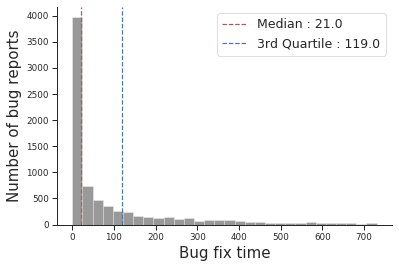

In [5]:
plot_hist(reports_freedesktop['days_to_resolve'], "Freedesktop")

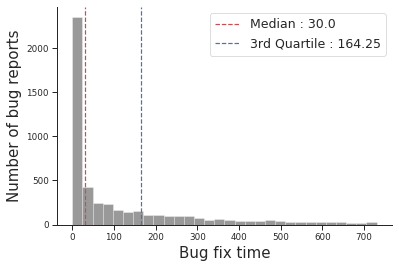

In [6]:
plot_hist(reports_gnome['days_to_resolve'], "Gnome")

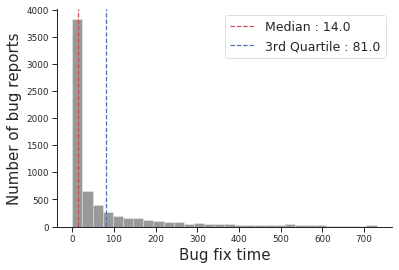

In [7]:
plot_hist(reports_netbeans['days_to_resolve'], "Netbeans")

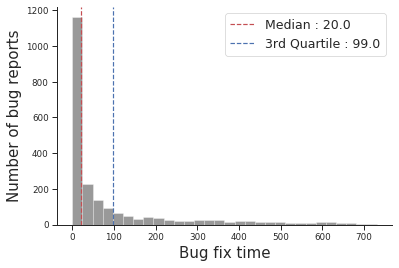

In [8]:
plot_hist(reports_mozilla['days_to_resolve'], "Mozilla")

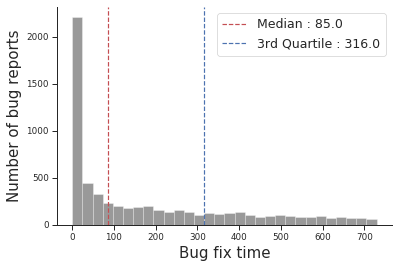

In [9]:
plot_hist(reports_winehq['days_to_resolve'], "WineHQ")

## 2.1  Evaluation Metrics

In [47]:
print('Project : {}\n'.format("Eclipse"))
results_eclipse = read_metrics_file('datasets/20190410110009_eclipse__result_metrics.csv')
results_eclipse['Grided'] = 'No'
#results_eclipse = results_eclipse.loc[results_eclipse['Terms'] == 100]
print('\n\nProject : {} (with grided)\n'.format("Eclipse"))
results_eclipse_w_grided = read_metrics_file('datasets/20190621030316_eclipse_knn_result_metrics_grided.csv')
results_eclipse_w_grided['Grided'] = 'Yes'
#results_eclipse_w_grided = results_eclipse_w_grided.loc[results_eclipse_w_grided['Terms'] == 100]

Project : Eclipse

There are 320 rows and 24 columns.



Project : Eclipse (with grided)

There are 55 rows and 24 columns.



### 2.1.1 Balanced Accuracy by Classifier (RQ1)

In [48]:
print('Project : {}\n'.format("Eclipse"))
results_eclipse_grouped = results_eclipse.groupby(['Project', 'Classifier', 'Grided']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})
#print(results_eclipse_grouped)

print('\n\nProject : {} (with grided) \n'.format("Eclipse"))
results_eclipse_w_grided_grouped = results_eclipse_w_grided.groupby(['Project', 'Classifier', 'Grided']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})

results_frames = [results_eclipse_grouped, results_eclipse_w_grided_grouped]

results_grouped_final = pd.concat(results_frames)
results_grouped_final
#print(results_grouped_final.to_latex())

Project : Eclipse



Project : Eclipse (with grided) 



/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


Min       Max      Mean       Std
Project Classifier    Grided                                        
Eclipse K-NN          No      0.567720  0.728206  0.671941  0.037213
        Naïve Bayes   No      0.354866  0.860990  0.657537  0.112184
        Random Forest No      0.331104  0.860915  0.511258  0.149260
        SVM           No      0.311300  0.860990  0.437380  0.157049
        K-NN          Yes     0.562611  0.781587  0.661650  0.047320

### 2.1.2 Balanced Accuracy by Classifier and N_Term (RQ2)

In [49]:

print('Project : {}\n'.format("Eclipse"))
results_eclipse_grouped = results_eclipse.loc[(results_eclipse['Classifier'] == 'K-NN') |  
                          (results_eclipse['Classifier'] == 'Naïve Bayes')].groupby(['Project', 'Classifier','Terms', 'Grided']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})

print('Project : {} (with grided)\n'.format("Eclipse"))
results_eclipse_grouped_w_grided = results_eclipse_w_grided.loc[(results_eclipse_w_grided['Classifier'] == 'K-NN') |  
                          (results_eclipse_w_grided['Classifier'] == 'Naïve Bayes')].groupby(['Project', 'Classifier','Terms', 'Grided']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})
all_results_metrics = pd.concat([results_eclipse
                      , results_eclipse_w_grided])

all_results_metrics_filtered = all_results_metrics.loc[(all_results_metrics['Classifier'] == 'K-NN') |  
                          (all_results_metrics['Classifier'] == 'Naïve Bayes')]



all_results_metrics_pivoted = pd.pivot_table(all_results_metrics_filtered
               , values  = ['balanced_acc']
               , index   = ['Project', 'Terms', 'Grided']
               , columns = ['Classifier']                              
               , aggfunc = {'balanced_acc': [min, max, np.mean, np.std]})

print(all_results_metrics_pivoted)


Project : Eclipse

Project : Eclipse (with grided)

                     balanced_acc                                              \
                              max                  mean                   min   
Classifier                   K-NN Naïve Bayes      K-NN Naïve Bayes      K-NN   
Project Terms Grided                                                            
Eclipse 100   No         0.728206    0.765152  0.674856    0.676112  0.567720   
              Yes        0.728765         NaN  0.657779         NaN  0.562611   
        200   No         0.714096    0.758406  0.670629    0.683357  0.573397   
              Yes        0.781587         NaN  0.673893         NaN  0.567308   
        300   No         0.711633    0.858213  0.671157    0.661376  0.578025   
              Yes        0.714515         NaN  0.665377         NaN  0.570885   
        400   No         0.708112    0.860990  0.670416    0.648406  0.580073   
              Yes        0.667673         NaN  0.633996  

/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


# 3.1 Eclipse

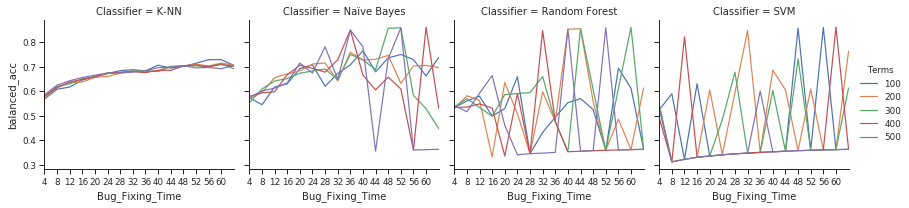

In [43]:
plot_line('eclipse', results_eclipse, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')


# 4. FreeDesktop

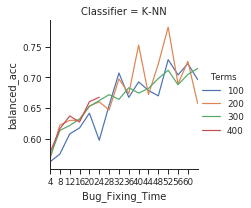

In [44]:
plot_line('eclipse', results_eclipse_w_grided, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')

In [45]:
results_eclipse.loc[:, ['Classifier', 'Terms', 'Bug_Fixing_Time', 'balanced_acc']]

,Classifier,Terms,Bug_Fixing_Time,balanced_acc
0,K-NN,100,4,0.567720
203,K-NN,400,48,0.703083
204,K-NN,400,52,0.706140
205,K-NN,400,56,0.699136
206,K-NN,400,60,0.708112
207,K-NN,400,64,0.702272
79,K-NN,200,64,0.706207
78,K-NN,200,60,0.714096
77,K-NN,200,56,0.702731
76,K-NN,200,52,0.709781


In [46]:
results_eclipse_w_grided.loc[:, ['Classifier', 'Terms', 'Bug_Fixing_Time', 'balanced_acc']]

,Classifier,Terms,Bug_Fixing_Time,balanced_acc
0,K-NN,100,4,0.562611
29,K-NN,200,56,0.689232
30,K-NN,200,60,0.725976
31,K-NN,200,64,0.657507
32,K-NN,300,4,0.570885
33,K-NN,300,8,0.613733
34,K-NN,300,12,0.621739
35,K-NN,300,16,0.632361
36,K-NN,300,20,0.652746
37,K-NN,300,24,0.662312


# 5. Gnome

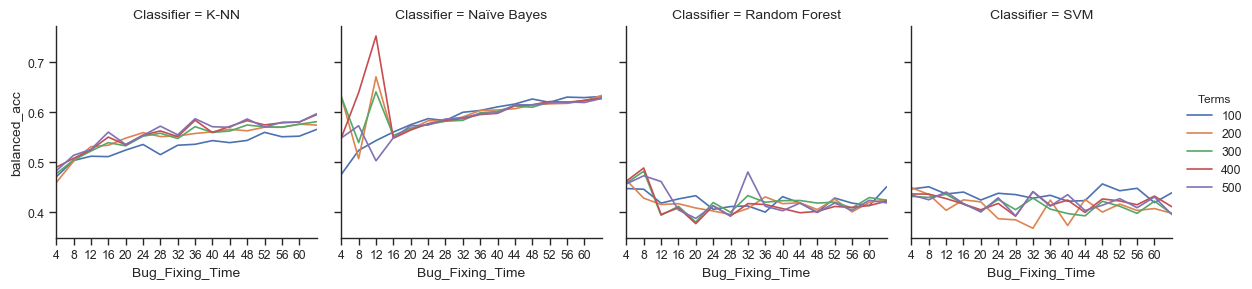

In [35]:
plot_line('gnome', results_gnome, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')

# 6. Mozilla

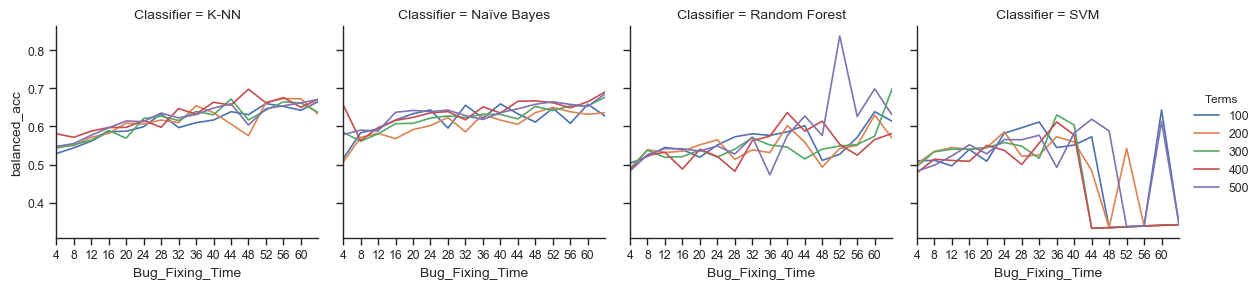

In [36]:
plot_line('mozilla', results_mozilla, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')

# 7. Netbeans

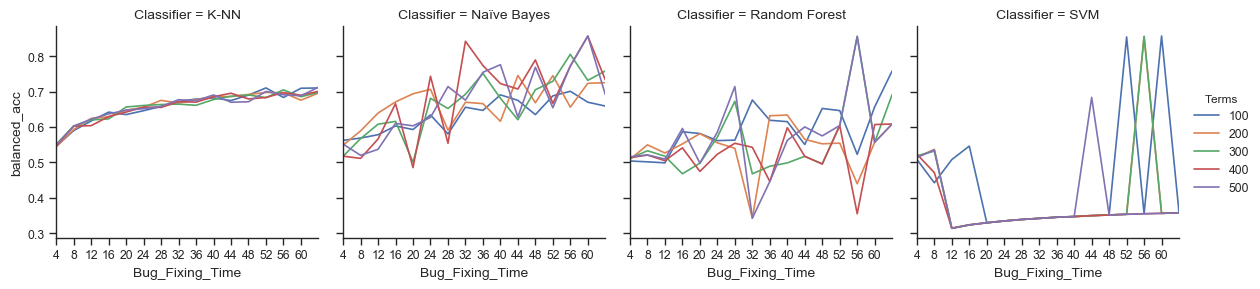

In [37]:
plot_line('netbeans', results_netbeans, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')

# 8. WineHQ

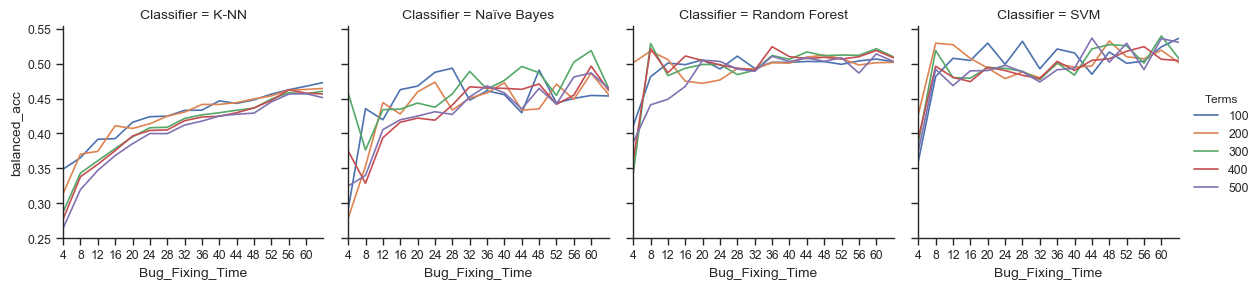

In [38]:
plot_line('winehq', results_winehq, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')